# SBER - Sberbank Rossii PAO

In [1]:
from data_functions import *

I will be giving investment recommendations for the company SBER in this notebook with price predictions using an LSTM model. I will be predicting daily, weekly, and monthly prices for the year 2021 and giving investment recommendations using bollinger bands with the price predictions.

# Data Preparation

In [2]:
SBER = pd.read_csv('./Data/Russia - Sberbank Rossii PAO (SBER).csv')
SBER

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2021",291.02,294,294.42,290.26,47.00M,-0.76%
1,"Mar 30, 2021",293.25,294.86,295.72,291.5,38.81M,-0.02%
2,"Mar 29, 2021",293.3,289.72,294.09,289.26,43.68M,0.71%
3,"Mar 26, 2021",291.22,288.63,292.75,288.32,56.07M,1.59%
4,"Mar 25, 2021",286.66,286.5,287.03,283.85,35.22M,0.30%
...,...,...,...,...,...,...,...
307,"Jan 09, 2020",257.99,259.4,261.76,257.01,38.33M,-0.45%
308,"Jan 08, 2020",259.15,253.57,259.15,253.03,40.82M,2.07%
309,"Jan 06, 2020",253.9,254.75,254.84,251.4,22.35M,-0.43%
310,"Jan 03, 2020",255,255.99,258.19,253.7,35.85M,0.10%


In [3]:
SBER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      312 non-null    object
 1   Price     312 non-null    object
 2   Open      312 non-null    object
 3   High      312 non-null    object
 4   Low       312 non-null    object
 5   Vol.      311 non-null    object
 6   Change %  311 non-null    object
dtypes: object(7)
memory usage: 17.2+ KB


In [4]:
## drop last row because it doesn't contain relevant information

SBER.drop(311, inplace=True)

In [5]:
## change date column to datetime

SBER['Date'] = pd.to_datetime(SBER['Date'], format='%b %d, %Y')

In [6]:
## change price columns to integer

SBER['Price'] = SBER['Price'].astype(float)
SBER['Open'] = SBER['Open'].astype(float)
SBER['High'] = SBER['High'].astype(float)
SBER['Low'] = SBER['Low'].astype(float)

In [7]:
SBER.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      311 non-null    datetime64[ns]
 1   Price     311 non-null    float64       
 2   Open      311 non-null    float64       
 3   High      311 non-null    float64       
 4   Low       311 non-null    float64       
 5   Vol.      311 non-null    object        
 6   Change %  311 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 19.4+ KB


In [8]:
SBER.sort_values(['Date'], ascending=True, ignore_index=True, inplace=True)
SBER

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-03,255.00,255.99,258.19,253.70,35.85M,0.10%
1,2020-01-06,253.90,254.75,254.84,251.40,22.35M,-0.43%
2,2020-01-08,259.15,253.57,259.15,253.03,40.82M,2.07%
3,2020-01-09,257.99,259.40,261.76,257.01,38.33M,-0.45%
4,2020-01-10,258.19,257.86,259.25,256.88,18.85M,0.08%
...,...,...,...,...,...,...,...
306,2021-03-25,286.66,286.50,287.03,283.85,35.22M,0.30%
307,2021-03-26,291.22,288.63,292.75,288.32,56.07M,1.59%
308,2021-03-29,293.30,289.72,294.09,289.26,43.68M,0.71%
309,2021-03-30,293.25,294.86,295.72,291.50,38.81M,-0.02%


In [9]:
## find rows for 2021 data

SBER.loc[SBER['Date'] > '2020-12-31']

,Date,Price,Open,High,Low,Vol.,Change %
250,2021-01-04,272.00,274.67,276.60,270.61,48.92M,0.13%
251,2021-01-05,275.20,272.69,275.70,270.28,45.58M,1.18%
252,2021-01-06,272.93,275.94,275.94,271.62,40.95M,-0.82%
253,2021-01-08,283.64,275.11,283.99,275.11,88.93M,3.92%
254,2021-01-11,289.49,282.86,292.95,279.48,112.35M,2.06%
...,...,...,...,...,...,...,...
306,2021-03-25,286.66,286.50,287.03,283.85,35.22M,0.30%
307,2021-03-26,291.22,288.63,292.75,288.32,56.07M,1.59%
308,2021-03-29,293.30,289.72,294.09,289.26,43.68M,0.71%
309,2021-03-30,293.25,294.86,295.72,291.50,38.81M,-0.02%


I'm going to be putting the first date of 2021 into the training set so the length of the testing set is 60. This is so the weekly and monthly test data sets have a uniform shape.

In [14]:
## split training data and testing data, testing data will be the year of 2021

training_data = SBER[['Date', 'Price']][:251]
testing_data = SBER[['Date', 'Price']][251:]

In [15]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(SBER[['Price']])
scaled_train_data = scaled_data[:251]

# Daily

In [18]:
X_train, y_train = get_train_data(scaled_train_data, 14)
X_test, y_test = get_test_data(SBER, testing_data, scaler, 14)

In [19]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [20]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=1, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [21]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train)    
    
    loss = criterion(y_train_pred, y_train)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.24210505187511444
Epoch  1 MSE:  0.0990646705031395
Epoch  2 MSE:  0.058465104550123215
Epoch  3 MSE:  0.04679064080119133
Epoch  4 MSE:  0.043286390602588654
Epoch  5 MSE:  0.04657404124736786
Epoch  6 MSE:  0.04467727616429329
Epoch  7 MSE:  0.038868311792612076
Epoch  8 MSE:  0.03451032564043999
Epoch  9 MSE:  0.035483840852975845
Epoch  10 MSE:  0.03160597383975983
Epoch  11 MSE:  0.02266434021294117
Epoch  12 MSE:  0.018835244700312614
Epoch  13 MSE:  0.012582643888890743
Epoch  14 MSE:  0.018059898167848587
Epoch  15 MSE:  0.01256876066327095
Epoch  16 MSE:  0.01705039292573929
Epoch  17 MSE:  0.010623928159475327
Epoch  18 MSE:  0.012697041034698486
Epoch  19 MSE:  0.009382527321577072
Epoch  20 MSE:  0.0084421681240201
Epoch  21 MSE:  0.010153016075491905
Epoch  22 MSE:  0.009499146603047848
Epoch  23 MSE:  0.008545350283384323
Epoch  24 MSE:  0.009429153054952621
Epoch  25 MSE:  0.009406426921486855
Epoch  26 MSE:  0.007904324680566788
Epoch  27 MSE:  0.007634

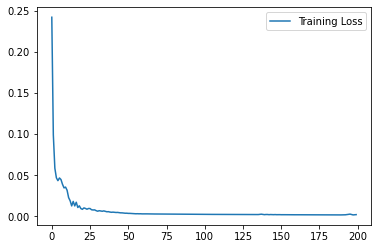

In [22]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [23]:
y_train_pred = model(X_train)
y_test_pred = model(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4.91 RMSE
Test Score: 5.08 RMSE


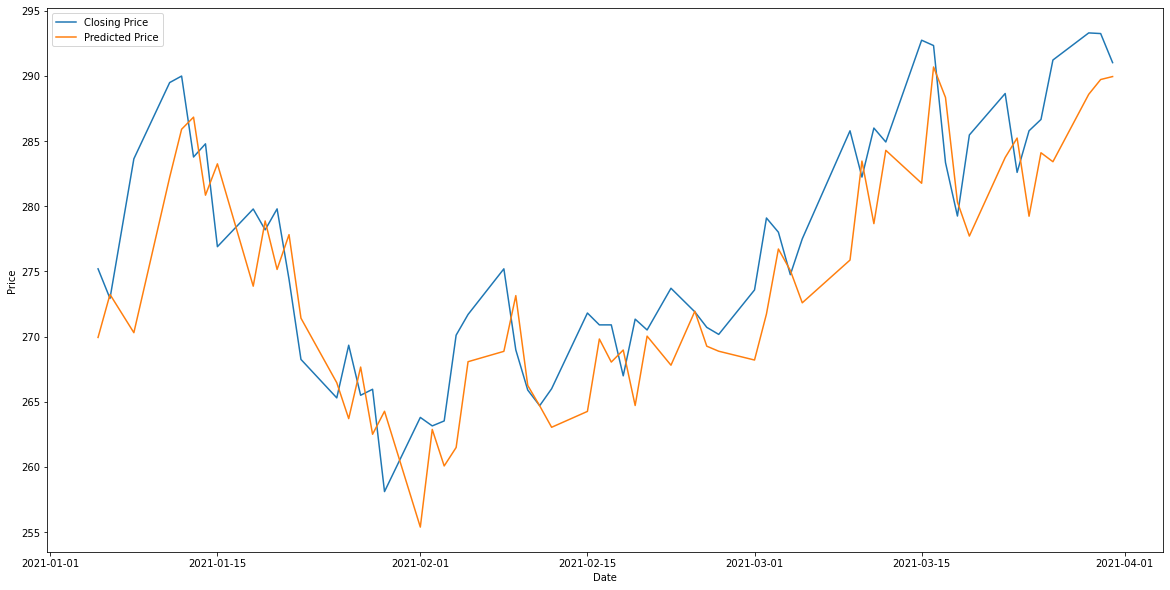

In [24]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test, label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The daily price predictions are very accurate. Let's see if we can make a profit using bollinger bands with this data.

In [25]:
boll_daily = SBER[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_daily['Price'] = price
boll_daily['SMA'] = sma(boll_daily['Price'], 20)
boll_daily['upper_bb'], boll_daily['lower_bb'] = bollinger(boll_daily['Price'], boll_daily['SMA'], 20)
boll_daily

C:\Users\Chris\AppData\Local\Temp/ipykernel_18688/2180012539.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_18688/2180012539.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['SMA'] = sma(boll_daily['Price'], 20)
C:\Users\Chris\AppData\Local\Temp/ipykernel_18688/2180012539.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-03,255.000000,NaN,NaN,NaN
1,2020-01-06,253.900000,NaN,NaN,NaN
2,2020-01-08,259.150000,NaN,NaN,NaN
3,2020-01-09,257.990000,NaN,NaN,NaN
4,2020-01-10,258.190000,NaN,NaN,NaN
...,...,...,...,...,...
306,2021-03-25,284.106018,278.796127,291.835433,265.756821
307,2021-03-26,283.417419,279.503732,291.884682,267.122783
308,2021-03-29,288.588928,280.489238,292.439530,268.538946
309,2021-03-30,289.723755,281.565271,292.705668,270.424874


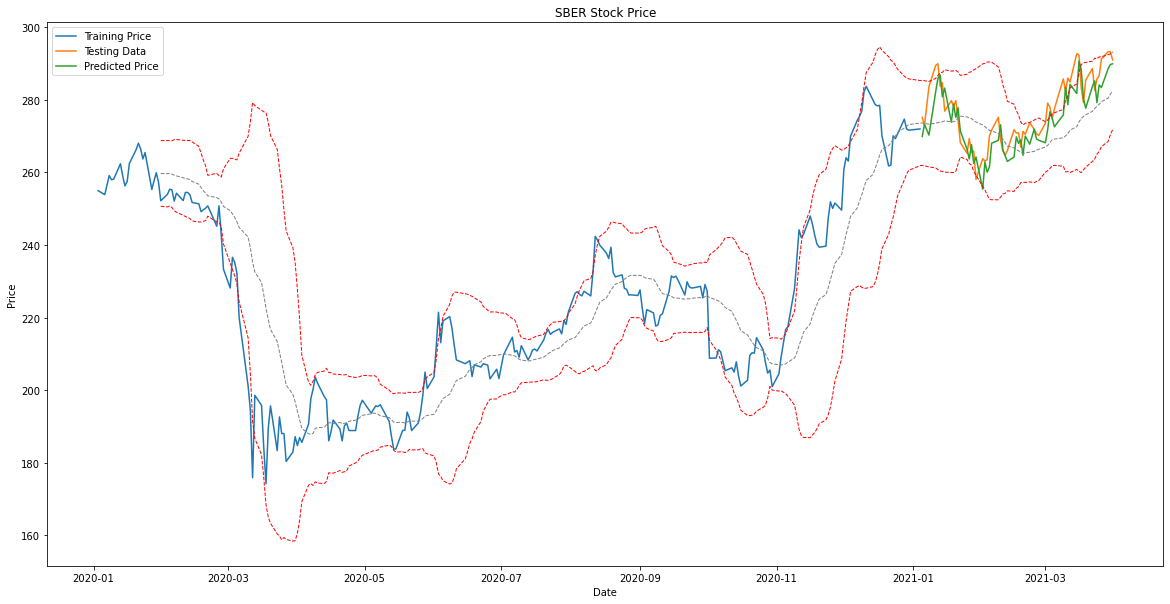

In [26]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'], boll_daily['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SBER Stock Price')
plt.legend()
plt.show()

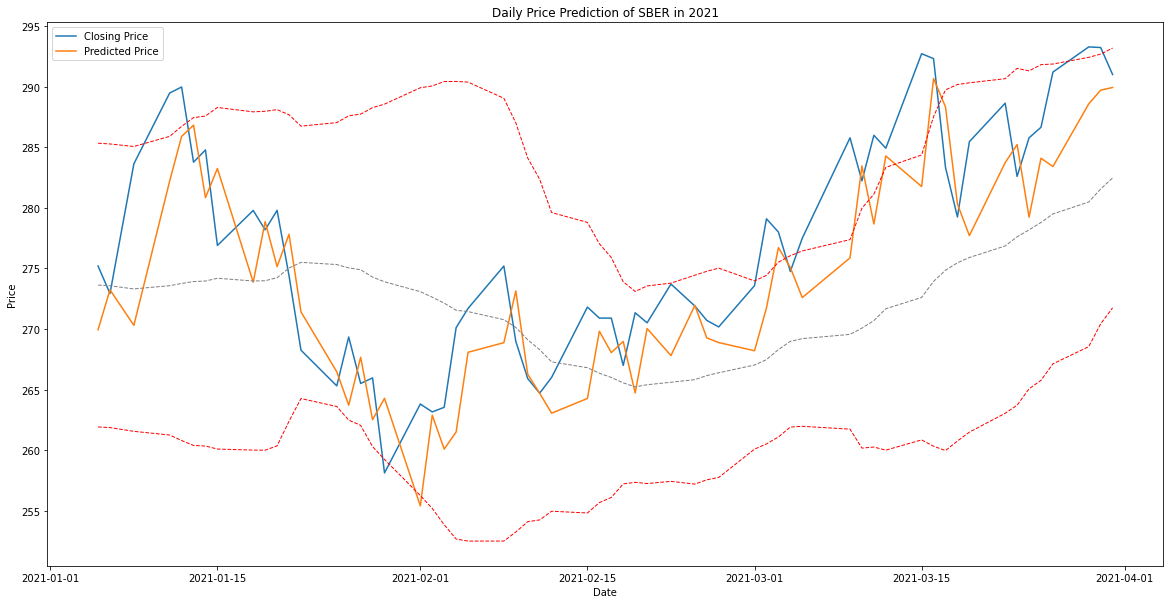

In [27]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'][251:], boll_daily['upper_bb'][251:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][251:], boll_daily['lower_bb'][251:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][251:], boll_daily['SMA'][251:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price Prediction of SBER in 2021')
plt.legend()
plt.show()

The investment strategy with bollinger bands is to buy when price hits the lower band and sell when price hits the upper band. It looks like there is one buying indicator and a couple selling indicators that we can choose from. 

In [31]:
i_df = boll_daily[boll_daily['Date'] > '2021-01-04']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_18688/2686279449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
251,2021-01-05,269.935608,273.625280,285.343700,261.906860,275.20
252,2021-01-06,273.235718,273.569066,285.283432,261.854701,272.93
253,2021-01-08,270.301514,273.309642,285.074587,261.544697,283.64
254,2021-01-11,282.223663,273.576325,285.910996,261.241654,289.49
255,2021-01-12,285.909332,273.761792,286.737331,260.786253,289.99
256,2021-01-13,286.835907,273.917087,287.457023,260.377151,283.78
257,2021-01-14,280.849426,273.962058,287.592039,260.332078,284.79
258,2021-01-15,283.255310,274.189824,288.297057,260.082591,276.90
259,2021-01-18,273.868713,273.965760,287.936470,259.995049,279.79
260,2021-01-19,278.875000,273.984510,287.981824,259.987195,278.19


In [32]:
## find buying indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
269,2021-02-01,255.386093,273.083996,289.925795,256.242197,263.8


In [33]:
## find selling indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
291,2021-03-03,276.720215,268.298535,275.516999,261.080071,278.01
295,2021-03-10,283.467865,270.069980,279.979392,260.160568,282.24
297,2021-03-12,284.291138,271.670671,283.349472,259.991870,284.93
299,2021-03-16,290.684998,273.928000,287.539986,260.316014,292.33


The buying indicator I will be using is on 02-01-2021 with a closing price of \\$263.80. The selling indicator I will be using is the one with the highest predicted price on 03-16-2021 with a closing price of \\$292.33. This results in a profit of 10.8%.

## Weekly

In [68]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=5, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=5, bias=True)
)


In [69]:
X_train_w, y_train_w = get_weekly_train_data(scaled_train_data, 16)
X_test_w, y_test_w = get_weekly_test_data(SBER, testing_data, scaler, 16)

In [70]:
X_train_w = torch.from_numpy(X_train_w).type(torch.Tensor)
X_test_w = torch.from_numpy(X_test_w).type(torch.Tensor)
y_train_w = torch.from_numpy(y_train_w).type(torch.Tensor)
y_test_w = torch.from_numpy(y_test_w).type(torch.Tensor)

In [71]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_w)    
    
    loss = criterion(y_train_pred, y_train_w)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.1895027905702591
Epoch  1 MSE:  0.1274266242980957
Epoch  2 MSE:  0.06997080147266388
Epoch  3 MSE:  0.10215587913990021
Epoch  4 MSE:  0.045655231922864914
Epoch  5 MSE:  0.050623394548892975
Epoch  6 MSE:  0.058313462883234024
Epoch  7 MSE:  0.057498540729284286
Epoch  8 MSE:  0.052209656685590744
Epoch  9 MSE:  0.04703523591160774
Epoch  10 MSE:  0.04489682614803314
Epoch  11 MSE:  0.04463745653629303
Epoch  12 MSE:  0.04217900335788727
Epoch  13 MSE:  0.03801531717181206
Epoch  14 MSE:  0.03474359214305878
Epoch  15 MSE:  0.03259463235735893
Epoch  16 MSE:  0.029838386923074722
Epoch  17 MSE:  0.02449788898229599
Epoch  18 MSE:  0.018438953906297684
Epoch  19 MSE:  0.0234531182795763
Epoch  20 MSE:  0.017634954303503036
Epoch  21 MSE:  0.023175938054919243
Epoch  22 MSE:  0.018229959532618523
Epoch  23 MSE:  0.014247122220695019
Epoch  24 MSE:  0.017149897292256355
Epoch  25 MSE:  0.014570795930922031
Epoch  26 MSE:  0.013099306263029575
Epoch  27 MSE:  0.014246500

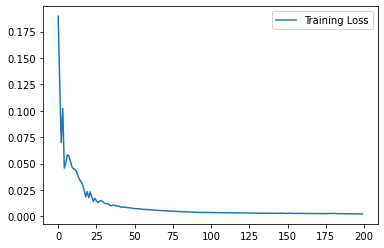

In [72]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [73]:
y_train_pred = model(X_train_w)
y_test_pred = model(X_test_w)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_w.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_w.reshape(12, 5).detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_w[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_w[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 222.44 RMSE
Test Score: 276.16 RMSE


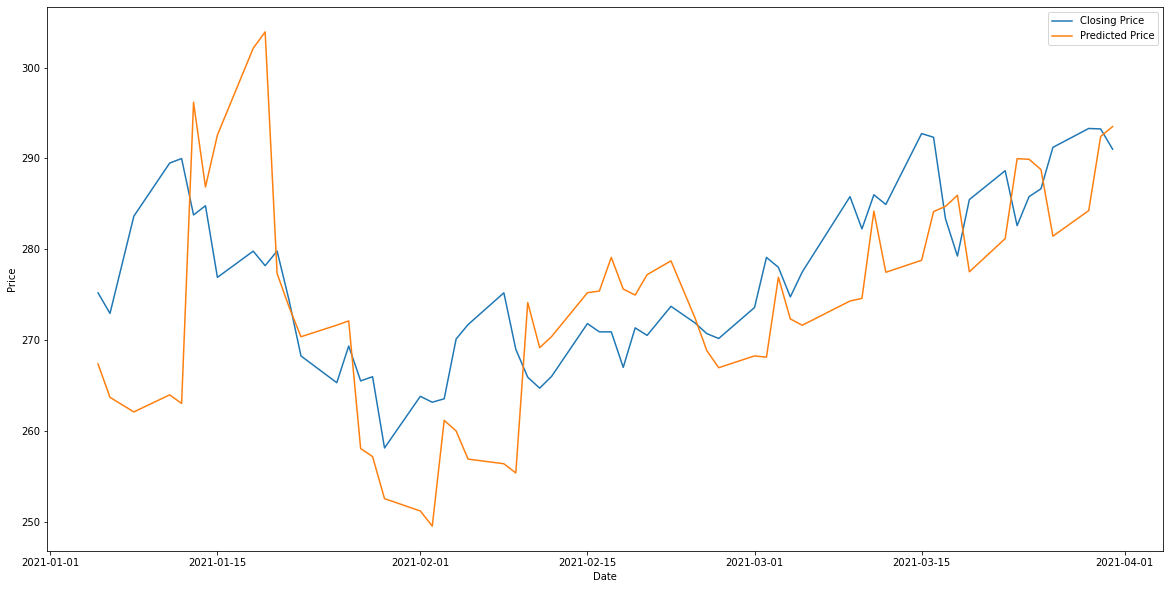

In [74]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Although the predictions are a little erratic in the beginning, they do a good job of predicting the closing price towards the end of the quarter.

In [75]:
boll_weekly = SBER[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_weekly['Price'] = price
boll_weekly['SMA'] = sma(boll_weekly['Price'], 15)
boll_weekly['upper_bb'], boll_weekly['lower_bb'] = bollinger(boll_weekly['Price'], boll_weekly['SMA'], 15)
boll_weekly

C:\Users\Chris\AppData\Local\Temp/ipykernel_18688/887532283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_18688/887532283.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['SMA'] = sma(boll_weekly['Price'], 15)
C:\Users\Chris\AppData\Local\Temp/ipykernel_18688/887532283.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-03,255.000000,NaN,NaN,NaN
1,2020-01-06,253.900000,NaN,NaN,NaN
2,2020-01-08,259.150000,NaN,NaN,NaN
3,2020-01-09,257.990000,NaN,NaN,NaN
4,2020-01-10,258.190000,NaN,NaN,NaN
...,...,...,...,...,...
306,2021-03-25,288.773926,281.028237,293.648580,268.407894
307,2021-03-26,281.438782,281.636117,293.301184,269.971049
308,2021-03-29,284.256348,282.477769,292.792905,272.162633
309,2021-03-30,292.421417,283.686035,294.139559,273.232511


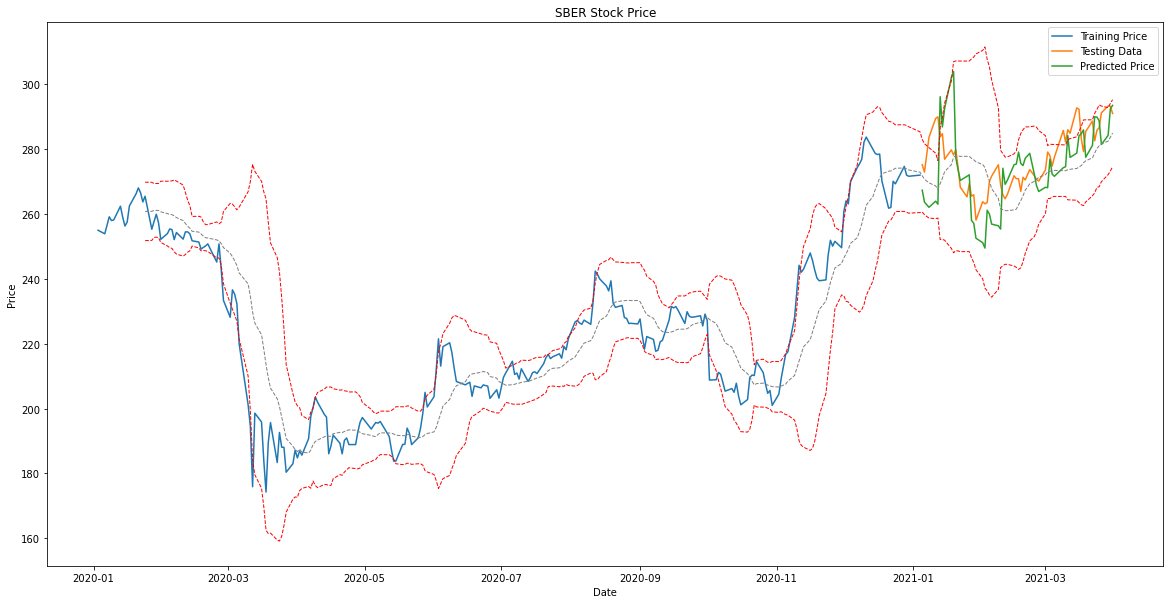

In [76]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'], boll_weekly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SBER Stock Price')
plt.legend()
plt.show()

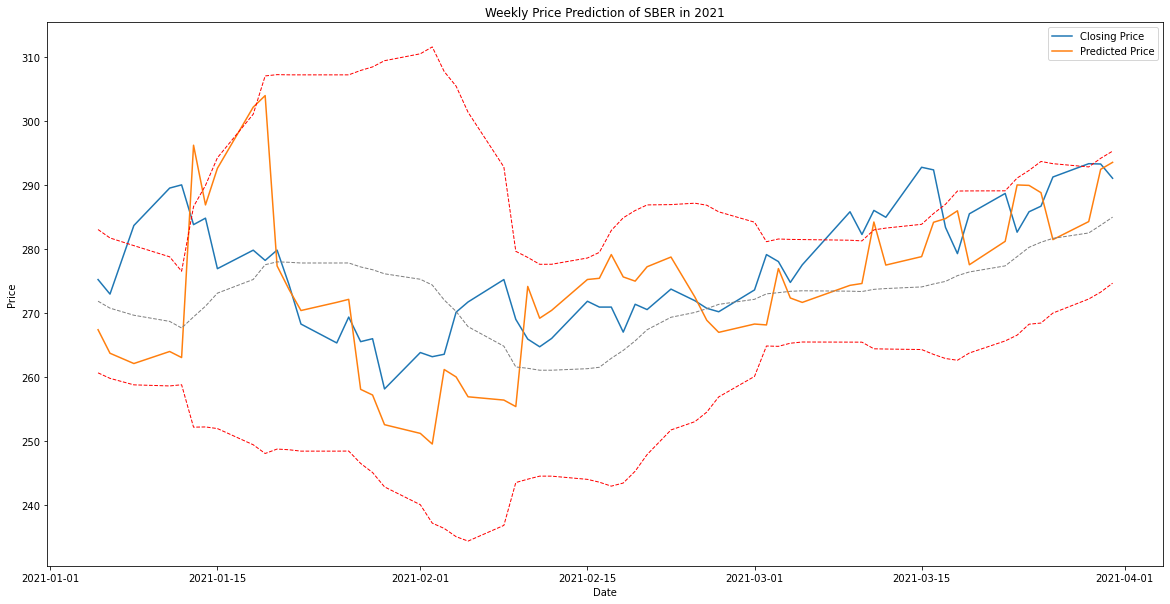

In [77]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'][251:], boll_weekly['upper_bb'][251:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][251:], boll_weekly['lower_bb'][251:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][251:], boll_weekly['SMA'][251:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Price Prediction of SBER in 2021')
plt.legend()
plt.show()

Although there are a couple sell indicators, there are no buy indicators that we can use on this graph. It seems like the large increase in predicted price in the beginning of the quarter prevented the lower band from giving us a buy indicator.

In [78]:
i_df = boll_weekly[boll_weekly['Date'] > '2021-01-04']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_18688/776260440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
251,2021-01-05,267.366516,271.817768,283.011157,260.624379,275.20
252,2021-01-06,263.689453,270.733731,281.699016,259.768447,272.93
253,2021-01-08,262.082733,269.625913,280.499217,258.752610,283.64
254,2021-01-11,263.962830,268.666769,278.751581,258.581957,289.49
255,2021-01-12,263.017792,267.634622,276.501906,258.767337,289.99
256,2021-01-13,296.183777,269.369540,286.596829,252.142251,283.78
257,2021-01-14,286.859650,271.040850,289.903387,252.178313,284.79
258,2021-01-15,292.576447,273.076613,294.228345,251.924881,276.90
259,2021-01-18,302.132599,275.212120,301.029442,249.394798,279.79
260,2021-01-19,303.935364,277.519811,307.007317,248.032305,278.19


In [79]:
## find buying indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price


In [80]:
## find selling indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
256,2021-01-13,296.183777,269.369540,286.596829,252.142251,283.78
259,2021-01-18,302.132599,275.212120,301.029442,249.394798,279.79
296,2021-03-11,284.188538,273.670748,282.957842,264.383653,286.00


I have no investment recommendation using the weekly price predictions.

# Monthly

In [110]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=20, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=20, bias=True)
)


In [111]:
X_train_m, y_train_m = get_monthly_train_data(scaled_train_data, 51)
X_test_m, y_test_m = get_monthly_test_data(SBER, testing_data, scaler, 51)

In [112]:
X_train_m = torch.from_numpy(X_train_m).type(torch.Tensor)
X_test_m = torch.from_numpy(X_test_m).type(torch.Tensor)
y_train_m = torch.from_numpy(y_train_m).type(torch.Tensor)
y_test_m = torch.from_numpy(y_test_m).type(torch.Tensor)

In [113]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_m)    
    
    loss = criterion(y_train_pred, y_train_m)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.19103358685970306
Epoch  1 MSE:  0.14422963559627533
Epoch  2 MSE:  0.09080334007740021
Epoch  3 MSE:  0.08033929020166397
Epoch  4 MSE:  0.04986344650387764
Epoch  5 MSE:  0.04523085057735443
Epoch  6 MSE:  0.0475117526948452
Epoch  7 MSE:  0.04742983728647232
Epoch  8 MSE:  0.047250714153051376
Epoch  9 MSE:  0.04719734191894531
Epoch  10 MSE:  0.045698996633291245
Epoch  11 MSE:  0.04332467541098595
Epoch  12 MSE:  0.04156032204627991
Epoch  13 MSE:  0.040616218000650406
Epoch  14 MSE:  0.039432648569345474
Epoch  15 MSE:  0.037514522671699524
Epoch  16 MSE:  0.03559321165084839
Epoch  17 MSE:  0.033959731459617615
Epoch  18 MSE:  0.03146888315677643
Epoch  19 MSE:  0.0279224943369627
Epoch  20 MSE:  0.026128489524126053
Epoch  21 MSE:  0.02251177281141281
Epoch  22 MSE:  0.02447756566107273
Epoch  23 MSE:  0.0269811749458313
Epoch  24 MSE:  0.021834030747413635
Epoch  25 MSE:  0.01975148357450962
Epoch  26 MSE:  0.018997253850102425
Epoch  27 MSE:  0.01997837424278

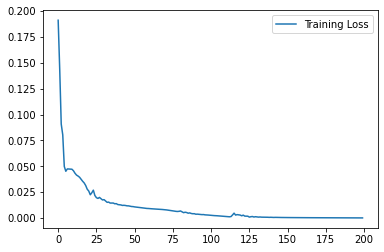

In [114]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [115]:
y_train_pred = model(X_train_m)
y_test_pred = model(X_test_m)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_m.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_m.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_m[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_m[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 215.31 RMSE
Test Score: 278.86 RMSE


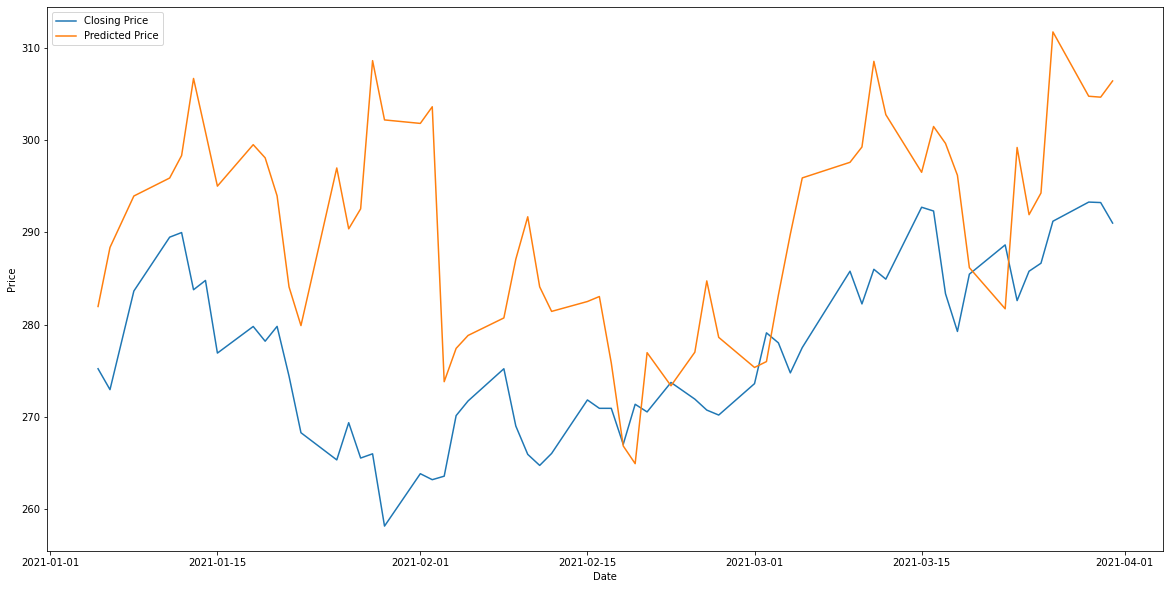

In [116]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The monthly price predictions are very inaccurate. It would seem unlikely to turn a profit using this data but let's see how our investment strategy performs with bollinger bands.

In [117]:
boll_monthly = SBER[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_monthly['Price'] = price
boll_monthly['SMA'] = sma(boll_monthly['Price'], 20)
boll_monthly['upper_bb'], boll_monthly['lower_bb'] = bollinger(boll_monthly['Price'], boll_monthly['SMA'], 20)
boll_monthly

C:\Users\Chris\AppData\Local\Temp/ipykernel_18688/1699277135.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_18688/1699277135.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['SMA'] = sma(boll_monthly['Price'], 20)
C:\Users\Chris\AppData\Local\Temp/ipykernel_18688/1699277135.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-03,255.000000,NaN,NaN,NaN
1,2020-01-06,253.900000,NaN,NaN,NaN
2,2020-01-08,259.150000,NaN,NaN,NaN
3,2020-01-09,257.990000,NaN,NaN,NaN
4,2020-01-10,258.190000,NaN,NaN,NaN
...,...,...,...,...,...
306,2021-03-25,294.287476,291.958093,311.015224,272.900962
307,2021-03-26,311.782532,293.310211,313.980165,272.640258
308,2021-03-29,304.795197,294.619604,314.676697,274.562512
309,2021-03-30,304.695068,296.087367,314.426748,277.747987


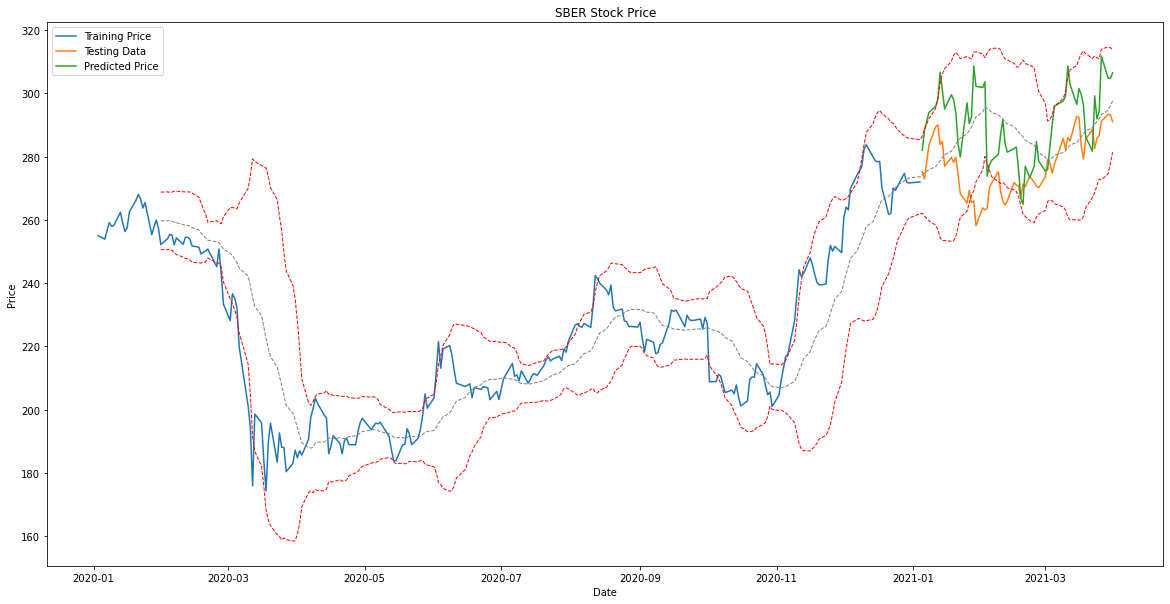

In [118]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'], boll_monthly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SBER Stock Price')
plt.legend()
plt.show()

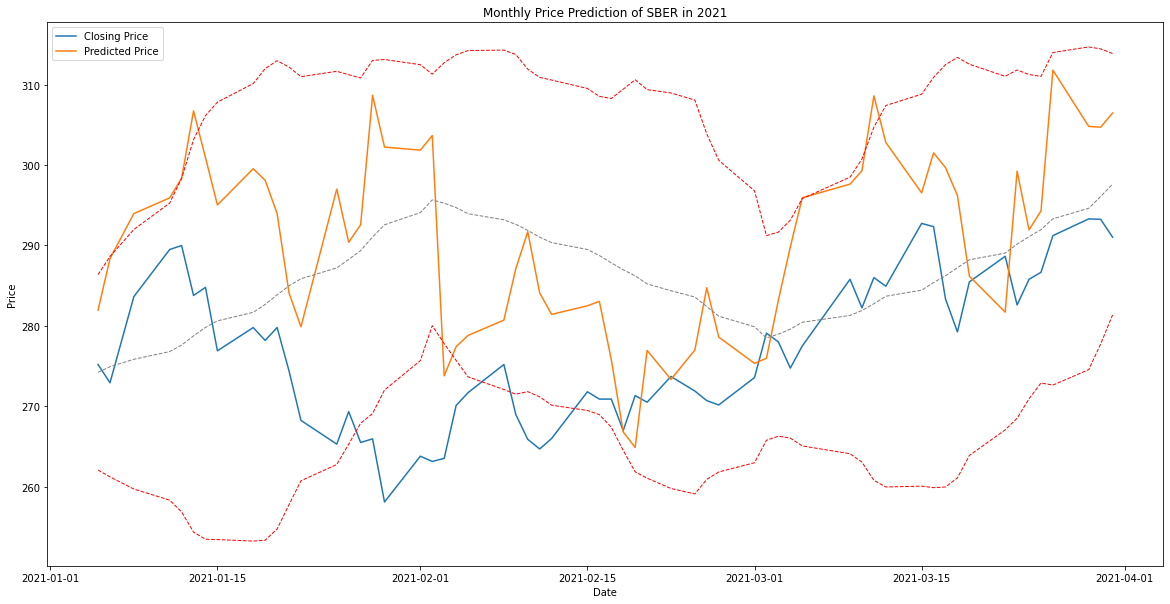

In [119]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'][251:], boll_monthly['upper_bb'][251:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][251:], boll_monthly['lower_bb'][251:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][251:], boll_monthly['SMA'][251:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monthly Price Prediction of SBER in 2021')
plt.legend()
plt.show()

It looks like there are a couple buy indicators and sell indicators that we can use with this data.

In [120]:
i_df = boll_monthly[boll_monthly['Date'] > '2021-01-04']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_18688/3829502227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
251,2021-01-05,281.959564,274.226478,286.373770,262.079186,275.20
252,2021-01-06,288.373291,274.927143,288.624551,261.229735,272.93
253,2021-01-08,293.959259,275.850606,291.981903,259.719308,283.64
254,2021-01-11,295.914673,276.801839,295.266193,258.337486,289.49
255,2021-01-12,298.353790,277.609529,298.342050,256.877007,289.99
256,2021-01-13,306.726166,278.759337,303.149176,254.369499,283.78
257,2021-01-14,300.915649,279.807620,306.137957,253.477282,284.79
258,2021-01-15,295.031494,280.624194,307.809002,253.439387,276.90
259,2021-01-18,299.535553,281.683472,310.117482,253.249462,279.79
260,2021-01-19,298.105194,282.663732,311.973912,253.353551,278.19


In [121]:
## find buying indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
271,2021-02-03,273.793243,295.250681,312.713364,277.787997,263.53


In [122]:
## find selling indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
253,2021-01-08,293.959259,275.850606,291.981903,259.719308,283.64
254,2021-01-11,295.914673,276.801839,295.266193,258.337486,289.49
255,2021-01-12,298.353790,277.609529,298.342050,256.877007,289.99
256,2021-01-13,306.726166,278.759337,303.149176,254.369499,283.78
293,2021-03-05,295.925323,280.450288,295.825134,265.075443,277.50
296,2021-03-11,308.586609,282.749013,304.693712,260.804314,286.00


The buying indicator I will use is on 02-03-2021 with a closing price of \\$263.53. The selling indicator I will use is the one with the highest predicted price on 03-11-2021 witha closing price of \\$286. This results in a 8.5% profit.

Even with very inaccurate predictions, we were able to turn a profit using the monthly price predictions.

# Conclusion

Using price predictions with an LSTM model on SBER, I was able to consistently make a profit using bollinger bands on the price predictions. The best performance was on the daily price predictions with profit of 10.8%. The weekly data was too inaccurate to give an investment recommendation and the monthly predictions made a profit of 8.5%.

I would recommend an investment strategy using the indicators given with the daily price predictions. This strategy leads to a profit of 10.8%.